# Исследование данных о продаже игр

>  Исследование для интернет-магазина, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

__Цель исследования__

Выявить факторы, определяющие успешность той или иной игры:
1. Зависимость продаж от региона.
2. Зависимость продаж от платформы.
3. Зависимость продаж от жанра.
4. Зависимость продаж от установленного рейтинга ESRB.


__Ход исследования__

Данные для исследования представлены в файле
`/datasets/games.csv`
. О качестве данных ничего не известно, в начале потребуется обзор данных.

Следом необходимо будет проверить данные на ошибки и их влияние на исследование. После - предпринять попытку исправить наибольшее возможное количество ошибок на этапе Предобработки данных, убедившись, что эти исправления не приведут к искажению результата. Затем создать необходимые столбцы с обработанными данными и приступить к проведению исследовательского анализа. 

В конечном итоге, необходимо будет сформулировать и проверить гипотезу. 

Таким образом исследование пройдет в шесть этапов:

* Обзор данных
* Предобработка данных
* Проведение анализа данных
* Составление портретов региональных пользователей (NA, EU, JP)
* Формулировка и проверка гипотезы
* Общие вывыды


_Перед началом работы загрузим необходимые библиотеки_

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st


## Обзор данных

Для знакомства с данными откроем файл и выведем:
    
1. Первые 20 строк таблицы

2. Общую информацию по таблице

3. Гистограммы для всех числовых столбцов таблицы

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv')

In [3]:
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


В файле представлены данные по продажам игр для различных платформ с указанием названия, платформы, года выпуска, жанра, продаж по регионам, оценками критиков и пользователей и рейтингом ESRB.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Из общей информации видно, что в файле находится 16715 строк, разбитых на 10 столбцов. Ряд столбцов требуют изменения типов данных отображения (год релиза, оценка пользователей). Также названия столбцов представлены в неудобном для работы формате.

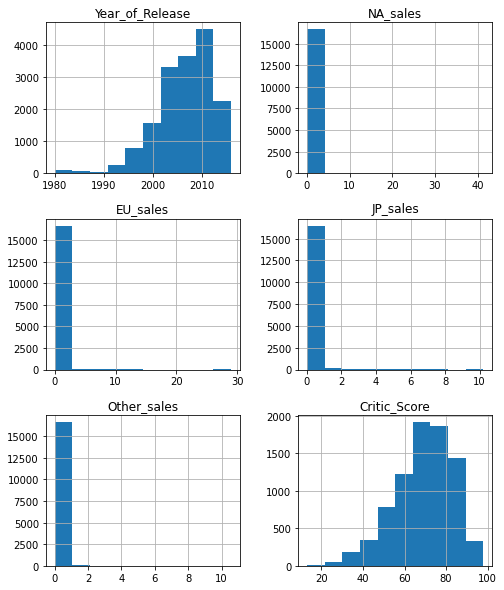

In [5]:
df.hist(figsize=(8, 10));

Из-за неверно заданных данных в таблице гистограммы сторятся не для всех столбцов, для которых ожидается. Отсутствуют гистограммы для столбцов с годом релиза и оценкой пользователей.

Также неинформативно отображаются данные по продажам. Выведем их с другими параметрами.

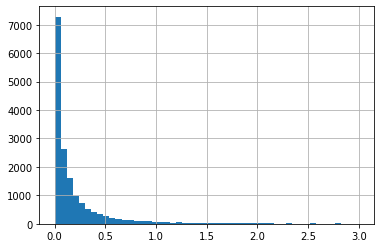

In [6]:
df['NA_sales'].hist(bins=50, range=(0,3));

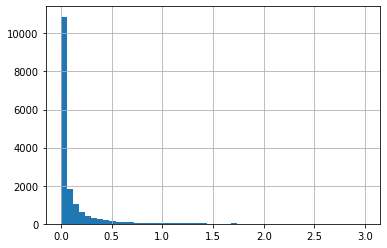

In [7]:
df['EU_sales'].hist(bins=50, range=(0,3));

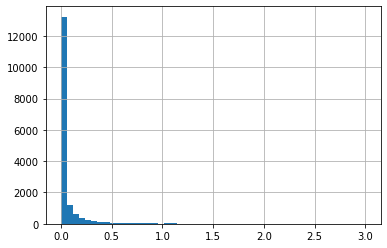

In [8]:
df['JP_sales'].hist(bins=50, range=(0,3));

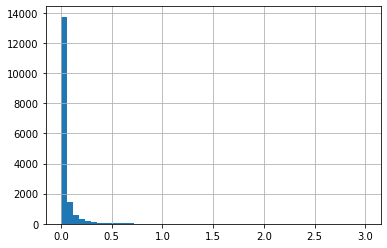

In [9]:
df['Other_sales'].hist(bins=50, range=(0,3));

__Вывод:__ Предствлены табличные данные с 16779 записями по продажам игр по регионам. Данные включают в себя инфомацию по названию, жанрам, году выпуска, данные по региональным продажам, рейтинги пользователей, критиков и рейтинг ESRB.
Данные представлены неравномерно и требуют предобработки.

## Предобработка данных

### Обработка заголовков столбцов

Первым шагом приведем все названия столбцов к единому формату (уберем заглавные буквы)

In [10]:
df.columns = df.columns.str.lower()

In [11]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Проверка показала, что названия столбцов приведены к единому формату.

### Преобразование типов данных

Теперь преобразуем несоответствующие типы данных

In [12]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Изменим тип данных в столбце __year_of_release__ на целые числа.

In [13]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

Также необходимо изменить тип данных в столбце __user_score__ на тип данных с плавающей точкой. Однако в столбце помимо пропусков есть еще значения:

In [14]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди значений столбца есть строка __tbd__. Значение __tbd - to be determined__ обозначает ситуацию, когда показатель (в данном случае - пользовательская оценка) пока еще не определен. В рамках данного исследования это равнозначно тому, что данные отсутствуют (в текущем датасете данные не обновятся, в случае появления более свежего датасета мы можем просто подгрузить его вместо текущего, также мы не можем идентифицировать, как составлялся текущий датасет, и в каких случаях могли возникать потери значений - сколько из отсутствующих занчений должны отображаться действительной пользовательской оценкой, а сколько - абревиатурой __tbd__, в дополнение, мы не знаем критериев, по которым выставлялась эта абревиатура - значит ли это, что голосов за данную игру не было вообще, или что не было определенного количества голосов - например, 100 или 1000).

Поэтому используем изменение данных, которое поменяет тип на данные с плавающей точкой и заменит все несоответствия на отсутствующие занчения.

In [15]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

Проверяем изменения типов данных:

In [16]:
df.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Данные были преобразованы в двух столбцах: столбец __year_of_release__ (год отображается целым числом) и стобец __user_score__ (оценку пользователей удобнее отображать типом данных с плавающей точкой.

### Обработка пропусков

Определим количество и процент пропусков в датасете:

In [17]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [18]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


1) Сначала проверим пропуски по названиям и жанрам (по две строки) и по годам выпуска игр (2%).

In [19]:
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Строки с пропусками по названиям и жанрам совпадают. В обеих строках отсутствуют как жанр, так и название игры. Они не восстановимы. Удалим их из датасета.

Пропуски по годам выпуска игр возникают всего в 2% представленных данных. Их также можно убрать без потери для качества данных.

In [20]:
df = df.dropna(subset=['name','year_of_release'])

2) __critic_score__ и __user_score__ - это данные по оценкам критиков и пользователей. Отсутствие данных может быть связано как с техническими сбоями, так и непосредственно с отсутствием рейтинга (по различным причинам: непопулярность игры, выход игры в ту эпоху, когда еще не были распространены рейтинги, недавний выход игры, которую еще не успели оценить).

Так как часто представлены одинаковые игры на разных платформах, можно предположить, что рейтинг одной игры на разных платформах будет схожим, и заполнить пропуски медианным значением.

In [21]:
df['critic_score'].isna().sum()

8461

In [22]:
df['critic_score'] = df['critic_score'].fillna(df.groupby('name')['critic_score'].transform('median'))

In [23]:
df['critic_score'].isna().sum()

7522

In [24]:
df['user_score'].isna().sum()

8981

In [25]:
df['user_score'] = df['user_score'].fillna(df.groupby('name')['user_score'].transform('median'))

In [26]:
df['user_score'].isna().sum()

7920

Удалось восстановить в районе 1000 пропусков в обоих столбцах. При этом осатвшиевся пропуски удалять нельзя. Оставляем как есть.

3) Пропуски в столбце __rating__ составляют 40%. Их тоже необходимо оставить, потому что здесь могут быть как технические ошибки (не указан рейтинг, который есть в наличии, так и те игры, которые не получали рейтинг (получение рейтинга - добровольная процедура).

Неободимо заметить, что датасет содержит данные по одинаковым играм, вышедшим на различных платформах. Оценка пользователей и критиков от платформы к платформе может быть различен, однако рейтинг присваивается игре независимо от платформы, поэтому часть пропусков можно заполнить:

In [27]:
df['rating'].isna().sum()

6676

In [28]:
df['rating'] = df.groupby('name').rating.transform('first')

In [29]:
df['rating'].isna().sum()

6259

К серьезному сокращению пропусков в столбце __rating__ это не привело, но тем не менее около 500 строк было восстановлено. Тем неменее рейтинг - важный показатель, где нельзя оставлять пустые значения. Вставим заглушку __unknown__

In [30]:
df['rating'] = df['rating'].fillna('Unknown')

In [31]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,46.000000
user_score,48.000000


В результате обработки пропусков были исключены пустые значения в столбцах __name__, __genre__ и __year_of_release__ как не оказывающие критического влияния на датасет. Также была проведена попытка восстановить пропуски в столбцах __critic_score__, __user_score__ (восстановлено в районе 1000 строк в каждом столбце) и столбце __rating__ (восстановлено около 500 строк). Оставшиеся пропуски восстановлению не подлежат, при этом их необходимо оставить в датасете.

### Обработка дубликатов

Проверим данные на наличие явных и неявных дубликатов.

In [32]:
df.duplicated().sum()

0

Явных дубликатов нет.

Осуществим проверку неявных дубликатов. Они могут находиться в столбцах __genre__, __platform__, __rating__ и __name__

In [33]:
df['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [34]:
df['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [35]:
df['rating'].sort_values().unique()

array(['E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', 'Unknown'], dtype=object)

В трех столбцах дубликатов не обнаружено.

Однако поиск неявных дубликатов позволил выявить несоответствие в данных в столбце __rating__:
1. рейтинг 'K-A' был отменен в 1994 году и заменен на рейтинг 'E' (исправим это в таблице)
2. рейтинг 'RP' выставляется при ожидании полноценного рейтинга (требуется проверить количество таких рейтингов и либо заменить их на пропуски, либо на действительный рейтинг, если это возможно)

In [36]:
df.loc[df['rating']  == 'K-A', 'rating'] = 'E'

In [37]:
df.query('rating == "RP"')['name'].unique()

array(['Supreme Ruler: Cold War'], dtype=object)

Так как рейтинг 'RP' у нас в единичном случае, то можно проверить действительно присвоенный рейтинг (https://www.esrb.org/ratings/31253/supreme-ruler-cold-war/) и внести изменения в датасет:

In [38]:
df.loc[df['rating']  == 'RP', 'rating'] = 'E10+'

In [39]:
df['rating'].sort_values().unique()

array(['E', 'E10+', 'EC', 'M', 'T', 'Unknown'], dtype=object)

Исправления в столбец __rating__ внесены.

Осталось проверить наличие неявных дубликатов в столбце __name__. Основной ошибкой может быть дублирование при неправильной записи заглавных и строчных букв. В случае, если при изменении строк в нижний регистр число уникальных наименований игр для каждой платформы останется равным оригинальному, можно считать, что неявных дубликатов в столбце нет.

In [40]:
d1 = df['name'].groupby(df['platform']).nunique()
d2 = df['name'].str.lower().groupby(df['platform']).nunique()
d1 == d2

platform
2600    True
3DO     True
3DS     True
DC      True
DS      True
GB      True
GBA     True
GC      True
GEN     True
GG      True
N64     True
NES     True
NG      True
PC      True
PCFX    True
PS      True
PS2     True
PS3     True
PS4     True
PSP     True
PSV     True
SAT     True
SCD     True
SNES    True
TG16    True
WS      True
Wii     True
WiiU    True
X360    True
XB      True
XOne    True
Name: name, dtype: bool

Проверка подтвердила отсутствие неявных дубликатов в датасете.

При обработке дубликатов были внесены изменения в столбец __rating__ для исправления несоответсвия текущему рейтингу в нескольких строках. При этом ни явных ни неявных дубликатов обнаружено не было.

### Суммарные продажи

Для дальнейшего исследования нам пригодятся данные по суммарным продажам.
Подсчитаем суммарные продажи во всех регионах и внесем их в отдельный столбец.

In [41]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [42]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


__Вывод:__ при предобработке данных были внесены следующие изменения в датасет:
* преобразованы заголовки столбцов
* приведены в соответствие типы данных
* обработаны пропуски
* подтверждено отсутствие дубликатов
* внесен дополнительный столбец __total_sales__ с данными по суммарным продажам.

## Исследовательский анализ данных

### Выпуск игр по годам

Посмотрим на выпуск игр по годам

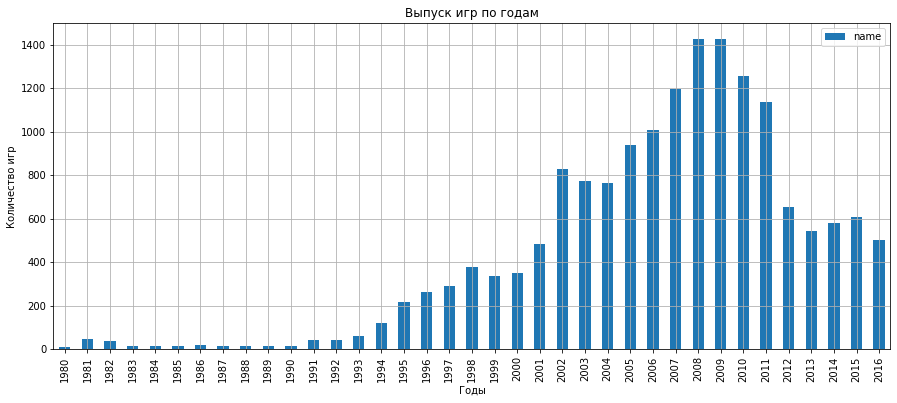

In [43]:
df.pivot_table(index='year_of_release',values='name', aggfunc='count').plot(kind='bar', grid=True, figsize=(15,6))
plt.title('Выпуск игр по годам')
plt.xlabel('Годы')
plt.ylabel('Количество игр')
plt.show()

Видно, что рост выпуска игр идет по нарастающей с пиком в 2008-2009 годах, а затем происходит спад до 2013 года, который сменяется тенденцией к росту (учтем, что данные за 2016 год у нас не полные).

### Изменения в продажах по платформам с наибольшим количеством проданных игр

Проверим, как меняются продажи в зависимости от платформы.

Для этого выделим 10 платформ с наибольшим количеством проданных игр.

In [44]:
platforms_top_10 = df.groupby('platform').agg({'total_sales':'sum'}).sort_values(by = 'total_sales', ascending = False).head(10)
platforms_top_10


,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


И сделаем список с перечислением 10 самых успешных платформ

In [45]:
platforms_top_10 = platforms_top_10.index

Теперь построим график, который продемонстрирует соотношение продаж игр по 10 наиболее успешным платформам по годам.

Для этого выделим из общего датаседа данные по 10 успешным платформам с информацией по году резиза и общим продажам каждой игры

In [46]:
platforms_top_10_data = df.loc[df['platform'].isin(platforms_top_10), ['platform', 'year_of_release','total_sales']].copy()


И сделаем таблицу, отражающую процентное соотношение по продажам на каждой из 10 наиболее успешных платформах по годам.

In [47]:
platforms_top_10_data_prop = pd.crosstab(index=platforms_top_10_data['year_of_release'],
                                         columns=platforms_top_10_data['platform'],
                                         values=platforms_top_10_data['total_sales'],
                                         aggfunc='sum', normalize='index')*100
platforms_top_10_data_prop = platforms_top_10_data_prop.astype(int)
platforms_top_10_data_prop

platform,3DS,DS,GBA,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1985,0,100,0,0,0,0,0,0,0,0
1994,0,0,0,100,0,0,0,0,0,0
1995,0,0,0,100,0,0,0,0,0,0
1996,0,0,0,100,0,0,0,0,0,0
1997,0,0,0,100,0,0,0,0,0,0
1998,0,0,0,100,0,0,0,0,0,0
1999,0,0,0,100,0,0,0,0,0,0
2000,0,0,0,71,28,0,0,0,0,0
2001,0,0,23,13,63,0,0,0,0,0


Данные таблицы позволили выявить артефакт в данных - невозможно появление в 1985 игры для платформы, выпущенной в 2004 году. Не будем учитывать эти данные при дальнейшем построении графика.

Предварительно также посмотрим на средний срок жизни платформы.

In [48]:
platforms_top_10_data_prop = platforms_top_10_data_prop.loc[platforms_top_10_data_prop.index >= 1994]
a = platforms_top_10_data_prop[platforms_top_10_data_prop != 0].count()
display(a)
print('Среднее количество лет:', a.median())

platform
3DS      6
DS       9
GBA      6
PS       9
PS2     10
PS3     11
PS4      4
PSP     10
Wii      9
X360    12
dtype: int64

Среднее количество лет: 9.0


В среднем срок жизни платформы получается в районе 9 лет.

Построим график

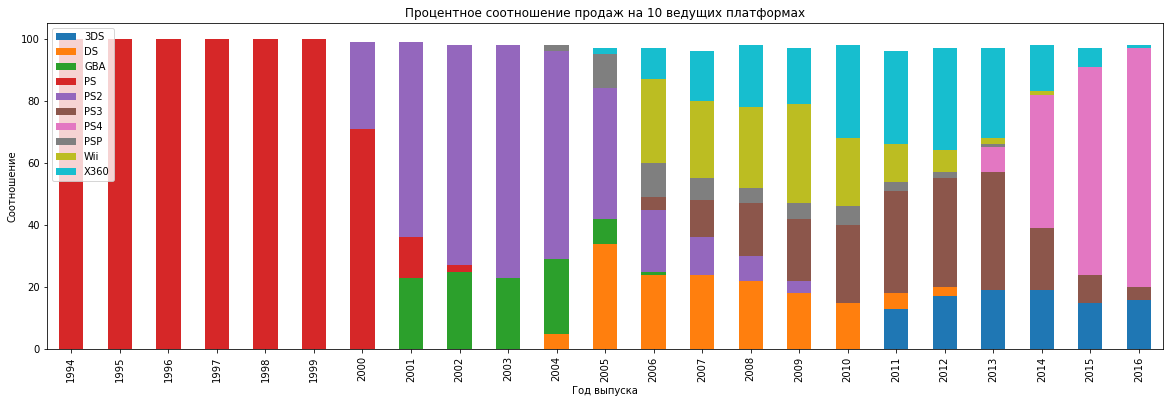

In [49]:
platforms_top_10_data_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(20, 6))

plt.legend(loc="upper left", ncol=1)
plt.title('Процентное соотношение продаж на 10 ведущих платформах')
plt.xlabel('Год выпуска')
plt.ylabel('Соотношение')

plt.show()

График подтверждает средний срок жизни платформы в 9-10 лет с периодом роста 4-6 лет и спада 3-5 лет.

Соответственно, __актуальный период__, в рамках которого следует проводить исследование для составления прогноза на 2017 год, необходимо ограничить 3 годами (т.е. 2013 - 2016 годы)

### Изменения в продажах по платформам в актуальном периоде

Посмотрим, какие платформы представлены в актуальном периоде и как распределяются прожажи между ними.

In [50]:
actual_df = df.loc[df['year_of_release'] >= 2013]
actual_df['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

В актуальном периоде представлены 11 платформ.

Построим график соотношения общих сумм продаж по этим платформам в актуальном периоде.

In [51]:
platforms_actual = actual_df.loc[df['platform'].isin(actual_df['platform'].unique()), ['platform', 'year_of_release','total_sales']].copy()
platforms_actual_prop = pd.crosstab(index=platforms_actual['year_of_release'],
                                         columns=platforms_actual['platform'],
                                         values=platforms_actual['total_sales'],
                                         aggfunc='sum', normalize='index')*100
platforms_actual_prop = platforms_actual_prop.astype(int)
platforms_actual_prop


platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,15,0,3,31,7,0,2,2,5,24,5
2014,13,0,4,14,30,0,3,1,6,10,16
2015,10,0,3,6,44,0,2,0,6,4,22
2016,11,0,4,2,53,0,3,0,3,1,20


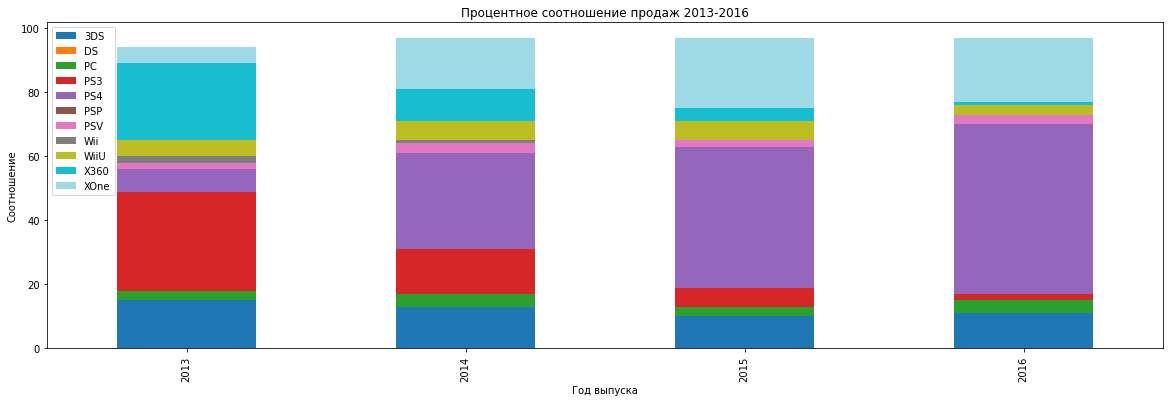

In [52]:
platforms_actual_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab20', 
                    figsize=(20, 6))

plt.legend(loc="upper left", ncol=1)
plt.title('Процентное соотношение продаж 2013-2016')
plt.xlabel('Год выпуска')
plt.ylabel('Соотношение')

plt.show()

Таблица и график показывают, что актуальные период выбран достаточно точно и отражает несколько тенденций:

1. показывает смену поколений платформ - PS3 на PS4 и XBOX360 на XBOXOne
2. отражает стабильность в продажах игр на PC (пусть общие цифры и не высоки) и на 3DS (с падением, что говорит о постепенном закате платформы)

Потенциально прибыльными платформами оказываются PS4 и XBOXOne. Также прибыль должна продолжить показывать 3DS.

Построим диаграммы размаха продаж по платформам в акутальном периоде.

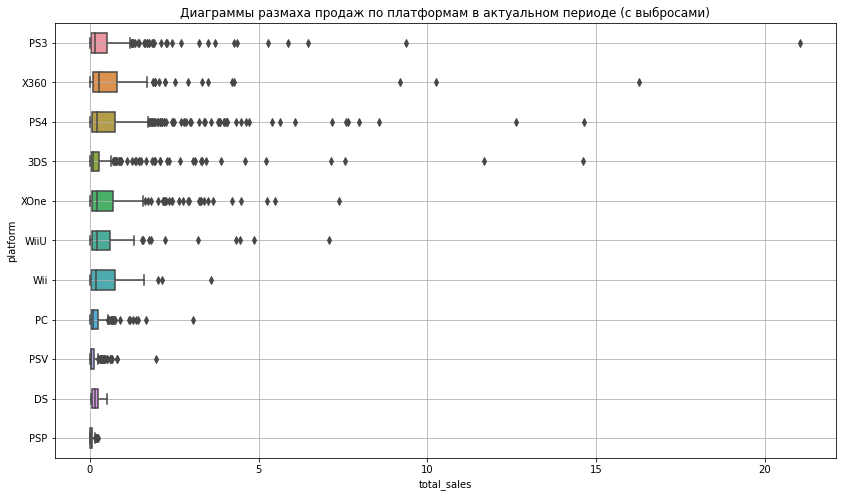

In [53]:
plt.figure(figsize=(14,8))
sns.boxplot(y= 'platform', x='total_sales', orient='h', data=actual_df, notch=False, width=0.5)
plt.title('Диаграммы размаха продаж по платформам в актуальном периоде (с выбросами)')
plt.grid(True)

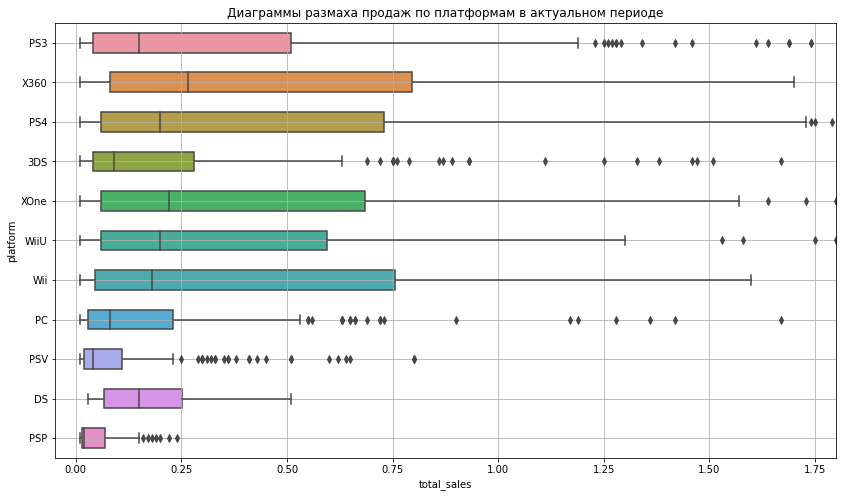

In [54]:
plt.figure(figsize=(14,8))
sns.boxplot(y= 'platform', x='total_sales', orient='h', data=actual_df, notch=False, width=0.5)
plt.title('Диаграммы размаха продаж по платформам в актуальном периоде')
plt.xlim(-0.05, 1.8)
plt.grid(True)



In [55]:
desc = platforms_actual.groupby('platform')['total_sales'].describe().reset_index()
desc.columns = ['platform', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
desc.sort_values('50%', ascending=False)

,platform,count,mean,std,min,25%,50%,75%,max
9,X360,186.0,0.735484,1.663275,0.01,0.0800,0.265,0.7950,16.27
10,XOne,247.0,0.645020,1.036139,0.01,0.0600,0.220,0.6850,7.39
4,PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
8,WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09
7,Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
1,DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
3,PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
0,3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
2,PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
6,PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96


Диаграммы размаха показывают, что ключевыми остаются 4 платформы - X360, XOne, PS4, WiiU. При этом важно учесть данные предыдущего графика, который показывает, что X360 и WiiU находятся на спаде.

### Влияние на продажи отзывов пользователей и критиков

Для начала исследуем влияние на продажи отзывов пользователей и критиков на примере конкретной популярной платформы - PS4.

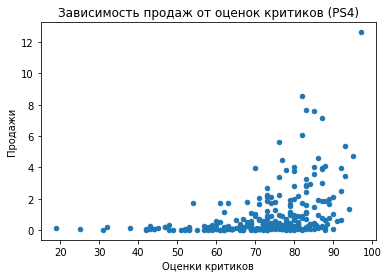

In [56]:
actual_df.loc[actual_df['platform'] == 'PS4'].plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('Зависимость продаж от оценок критиков (PS4)')
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')
plt.show()

In [57]:
actual_df.loc[actual_df['platform'] == 'PS4']['total_sales'].corr(actual_df.loc[actual_df['platform'] == 'PS4']['critic_score'])

0.39060159731130356

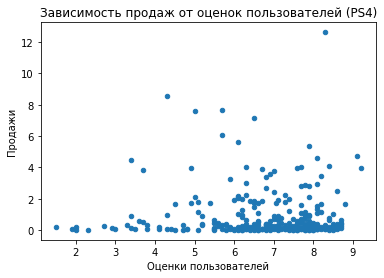

In [58]:
actual_df.loc[actual_df['platform'] == 'PS4'].plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Зависимость продаж от оценок пользователей (PS4)')
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи')
plt.show()

In [59]:
actual_df.loc[actual_df['platform'] == 'PS4']['total_sales'].corr(actual_df.loc[actual_df['platform'] == 'PS4']['user_score'])

-0.02218030886581895

Диаграммы рассеяния показывают, что определенная, хотя и слабая, корелляция оценок критиков и продаж присутствует, а с оценками пользователей корреляция отсутствует.

Получим теперь данные для всех платформ за актуальный период.

__Зависимость продаж от оценок критиков по платформам в актуальный период__

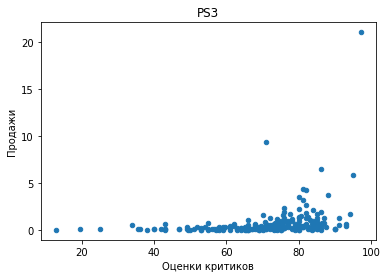

0.2915045197868703

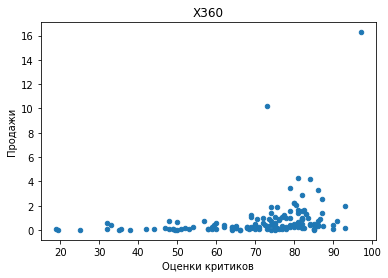

0.28855989114218167

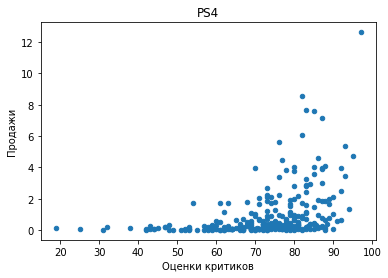

0.39060159731130356

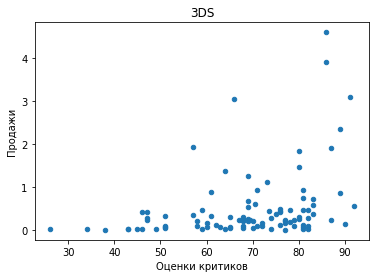

0.34229673952184747

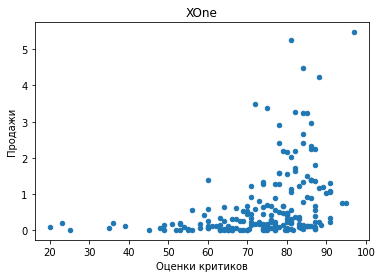

0.3755776004203433

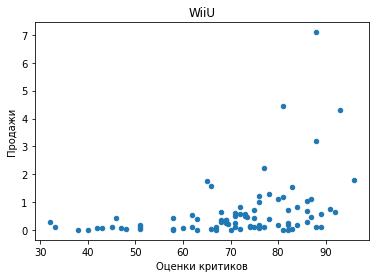

0.3771439621461661

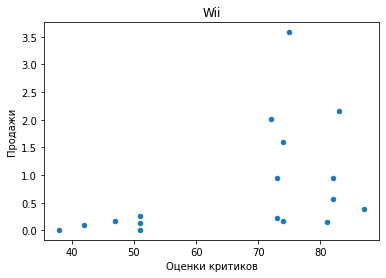

0.44279548702590027

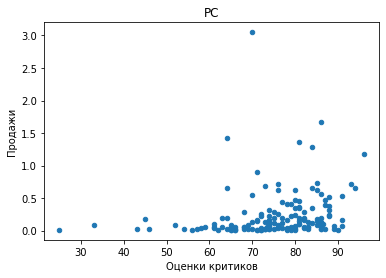

0.19469745416185014

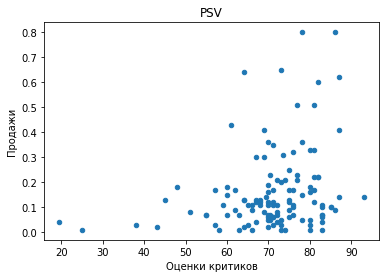

0.2641231352459256

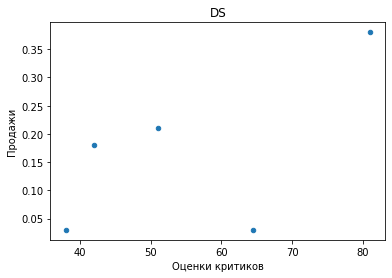

0.6067758783389166

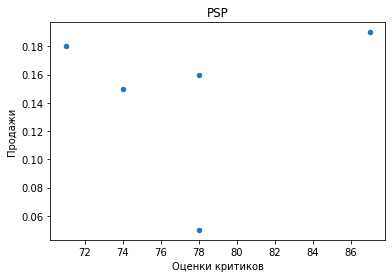

0.10531806512432615

In [60]:
for i in actual_df['platform'].unique():
    actual_df.loc[actual_df['platform'] == i].plot(x='critic_score', y='total_sales', kind='scatter')
    plt.title(i)
    plt.xlabel('Оценки критиков')
    plt.ylabel('Продажи')
    plt.show()
    display(actual_df.loc[actual_df['platform'] == i]['total_sales'].corr(actual_df.loc[actual_df['platform'] == i]['critic_score']))
    
    

Корреляция продаж от оценок критиков присутствует, однако выражена умеренно. Вероятность того, что игры с высокими оценками критиков будут продваваться лучше есть, однако так случается не для всех игр.

__Зависимость продаж от оценок пользователей по платформам в актуальный период__

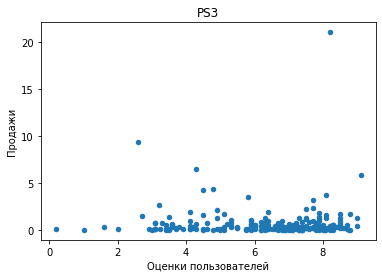

0.008391060284578221

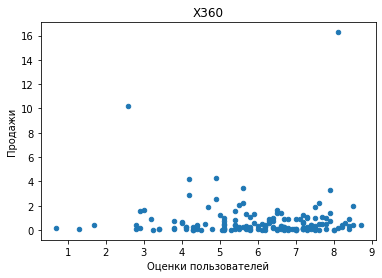

-0.01326926966399776

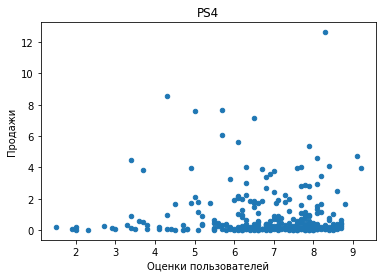

-0.02218030886581895

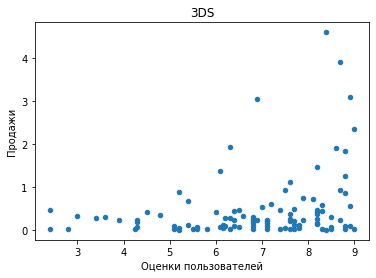

0.2860254423337859

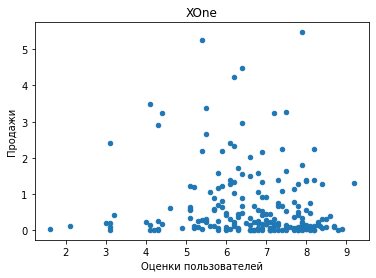

-0.09647892333700656

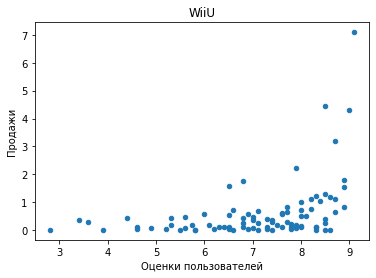

0.3981753113396833

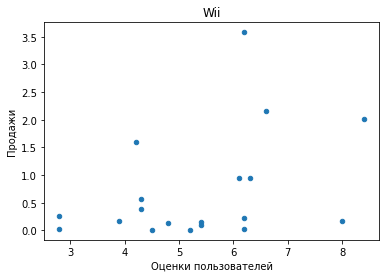

0.3900238778962282

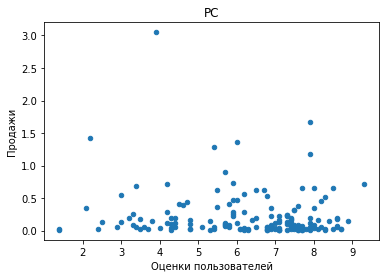

-0.10679692765648532

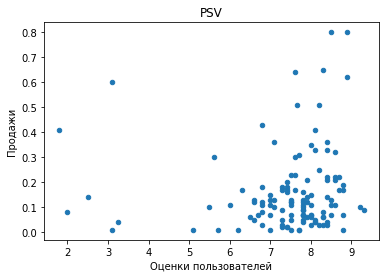

0.06420641733873728

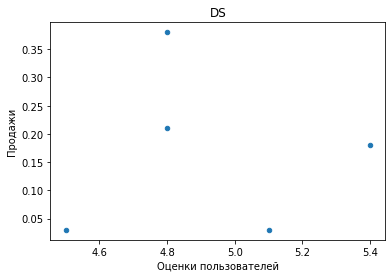

0.04213581191685966

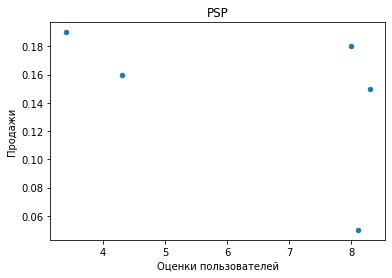

-0.49511986322687634

In [61]:
for i in actual_df['platform'].unique():
    actual_df.loc[actual_df['platform'] == i].plot(x='user_score', y='total_sales', kind='scatter')
    plt.title(i)
    plt.xlabel('Оценки пользователей')
    plt.ylabel('Продажи')
    plt.show()
    display(actual_df.loc[actual_df['platform'] == i]['total_sales'].corr(actual_df.loc[actual_df['platform'] == i]['user_score']))

Корреляция продаж с оценками пользователей либо отсутствует, либо отрицательная - чем больше продаж игры, тем больше недовольных оценок. Отдельно стоят платформы компании Nintendo, у которых видна корреляция между продажами и оценками пользователей (и эта корреляция соспоставима с корреляцией между прождажами и оценками критиков по тем же платформам). Видимо, комьюнити пользователей компании Nintendo достаточно сплочено и доверяет собственным оценкам.

### Распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам

In [62]:
actual_df.groupby('genre').agg({'name':'count'}).sort_values(by = 'name', ascending = False)

,name
genre,
Action,766
Role-Playing,292
Adventure,245
Sports,214
Shooter,187
Misc,155
Racing,85
Fighting,80
Platform,74


Больше всего в актуальном периоде выходит игр жанра __Action__, следом идут жанры __Role-Playing, Adventure, Sports___. Замыкает 5-ку ведущих жанров жанр __Shooter__.

Посмотрим на данные по продажам по каждому жанру. Для этого найдем медианные значения и построим диаграммы размаха.

In [63]:
actual_df.groupby('genre').agg({'total_sales':'median'}).sort_values(by = 'total_sales', ascending = False)

,total_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


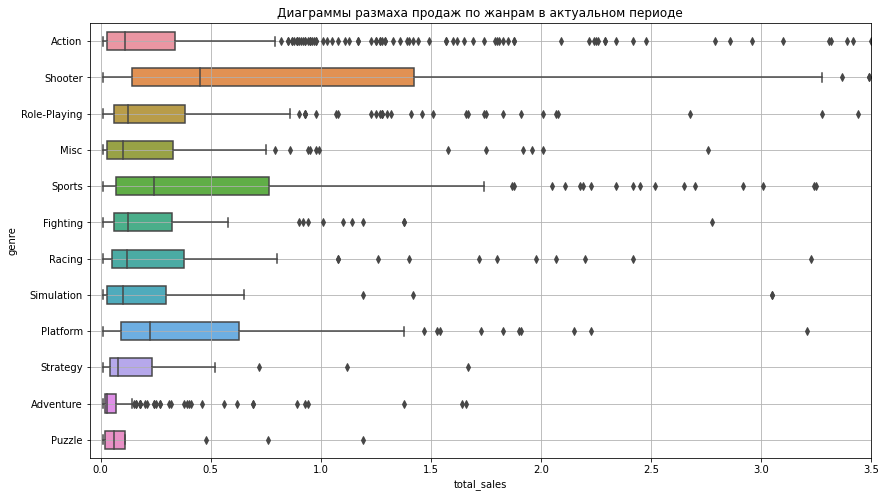

In [64]:
plt.figure(figsize=(14,8))
sns.boxplot(y= 'genre', x='total_sales', orient='h', data=actual_df, notch=False, width=0.5)
plt.title('Диаграммы размаха продаж по жанрам в актуальном периоде')
plt.xlim(-0.05, 3.5)
plt.grid(True)

Диаграммы размаха показывают, что самыми прибыльными жанрами оказываютс жанры __Shooter, Sports, Platform__.

Низкие продажи показывают жанры __Strategy,  Puzzle, Adventure__.

__Вывод:__ при исследовании данных был выделен актуальный период (2013-2016 годы), а также обнаружено следующее:
* количество новых игр после спада до 2013 года опять начало расти
* актуальными остаются несколько ключевых платформ (X360, XOne, PS4, WiiU), при этом вX360 и WiiU находятся на спаде
* корреляция продаж с оценками критиков присутствует, но выражена умеренно, а с оценками пользователей - также небольшая, но отрицательная по ключевым платформам
* самыми прибыльными жанрами оказываются жанры __Shooter, Sports, Platform__.

## Портрет пользователя каждого региона

Определим для каждого региона портрет пользователя: топ-5 попоулярных платформ, топ-5 популярных жанров

### Топ-5 популярных платформ

In [65]:
p1 = actual_df.groupby('platform').agg({'na_sales':'sum'}).sort_values(by = 'na_sales', ascending = False).head()
d1

platform
2600     116
3DO        3
3DS      512
DC        52
DS      2121
GB        97
GBA      811
GC       542
GEN       27
GG         1
N64      316
NES       98
NG        12
PC       956
PCFX       1
PS      1190
PS2     2127
PS3     1305
PS4      392
PSP     1193
PSV      429
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1286
WiiU     147
X360    1231
XB       803
XOne     247
Name: name, dtype: int64

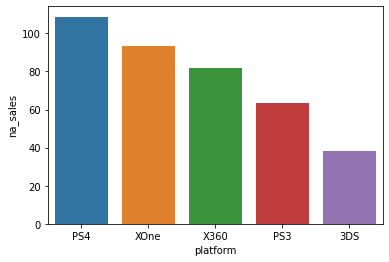

In [66]:
sns.barplot(data=p1, x=p1.index, y='na_sales');

In [67]:
p2 = actual_df.groupby('platform').agg({'eu_sales':'sum'}).sort_values(by = 'eu_sales', ascending = False).head()
p2

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


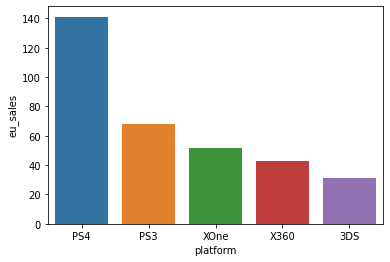

In [68]:
sns.barplot(data=p2, x=p2.index, y='eu_sales');

In [69]:
p3 = actual_df.groupby('platform').agg({'jp_sales':'sum'}).sort_values(by = 'jp_sales', ascending = False).head()
p3

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


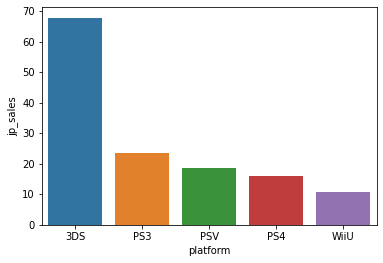

In [70]:
sns.barplot(data=p3, x=p3.index, y='jp_sales');

Американский и европейский рынки в целом похожи, в топ-5 платформ представлены __PS4, PS3, XOne, X360__ и __3DS__, лидирующие позиции занимает PS4.

На японском рынке в топ-5 отсутствуют платформы компании Microsoft, а ведущую позицию занимает __3DS__.

### Топ-5 популярных жанров

In [71]:
g1 = actual_df.groupby('genre').agg({'na_sales':'median'}).sort_values(by = 'na_sales', ascending = False).head()
g1

,na_sales
genre,
Shooter,0.200
Platform,0.090
Sports,0.080
Fighting,0.045
Racing,0.030


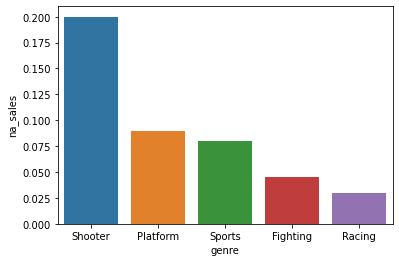

In [72]:
sns.barplot(data=g1, x=g1.index, y='na_sales');

In [73]:
g2 = actual_df.groupby('genre').agg({'eu_sales':'median'}).sort_values(by = 'eu_sales', ascending = False).head()
g2

,eu_sales
genre,
Shooter,0.190
Platform,0.080
Racing,0.060
Sports,0.050
Simulation,0.035


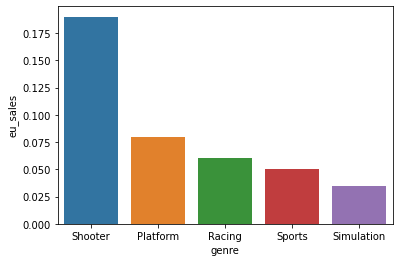

In [74]:
sns.barplot(data=g2, x=g2.index, y='eu_sales');

In [75]:
g3 = actual_df.groupby('genre').agg({'jp_sales':'median'}).sort_values(by = 'jp_sales', ascending = False).head()
g3

,jp_sales
genre,
Role-Playing,0.05
Fighting,0.03
Misc,0.02
Puzzle,0.02
Action,0.01


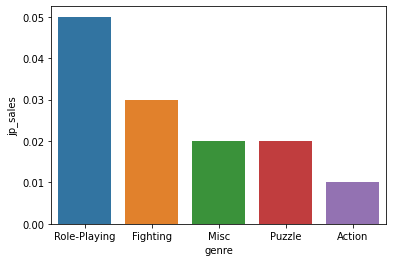

In [76]:
sns.barplot(data=g3, x=g3.index, y='jp_sales');

На американском и европейском рынках опять схожая картина - топ занимают жанры __Shooter, Sports__.

В Японии на первое место выходит жанр __Role-Playing__, а также жанр __Fighting__.

### Продажи в регионах по рейтингу ESBR

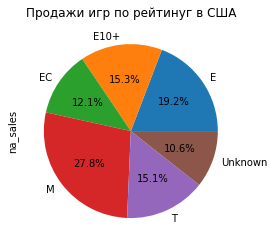

In [77]:
df.pivot_table(index='rating',values='na_sales').plot(kind='pie', subplots=True, autopct='%1.1f%%', legend=False, normalize=True)
plt.title('Продажи игр по рейтинуг в США');


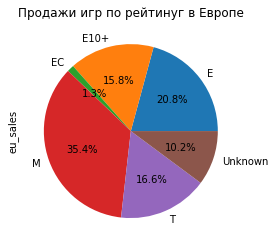

In [78]:
df.pivot_table(index='rating',values='eu_sales').plot(kind='pie', subplots=True, autopct='%1.1f%%', legend=False, normalize=True)
plt.title('Продажи игр по рейтинуг в Европе');

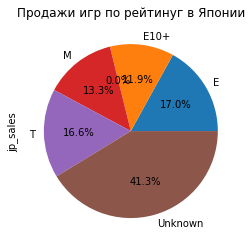

In [79]:
df.pivot_table(index='rating',values='jp_sales').plot(kind='pie', subplots=True, autopct='%1.1f%%', legend=False, normalize=True)
plt.title('Продажи игр по рейтинуг в Японии');

Продажи в зависимости от рейтинга показывают, что предпочтения американских и европейских пользователей в целом совпадают, за исключением большего стремления к покупке игр с возрастным рейтингом в Европе относительно Америки.

В Японии рейтинг __ESBR__ оказывается менее показательным. Большая часть игр, покупаемых в Японии, не получала рейтинг __ESBR__, потому что в Японии существует своя система рейтинга, а основные продажи приходятся на игры, предназначенные именно для японского рынка. 

__Вывод:__ европейский и американский потребители в целом схожи, за исключением предпочтений игр с более "взрослым" рейтингом в Европе. Японский потребитель отличается своими предпочтениями как по жанрам (ролевые игры), так и по используемым платформам (отсутствие в топ-5 платформ компании microsoft), а также явным предпочтением к играм, предназначенным для японского рынка (а значит - не получающим рейтинг ESBR).

## Гипотезы

Проверим две гипотезы:
1. гипотезу по пользовательским рейтингам платформ Xbox One и PC
2. гипотезу по пользовательским рейтингам жанров Action и Sports

Для этого подготовим датасет без пропусков в столбце __user_score__.

In [80]:
actual_df_hyp = actual_df.dropna(subset=['user_score'])

### Рейтинги платформ

Сформулируем нулевую и альтернативную гипотезы для платформ Xbox One и PC относительно пользовательского рейтинга. При формулировке альтернативной гипотезы будем использовать двустороннюю гипотезу:

- Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

Для проверки гипотезы будем использовать статистический тест с использованием t-распределения взяв уровень значимости 0.05.

In [81]:
xone = actual_df_hyp.query('platform == "XOne"')
pc = actual_df_hyp.query('platform == "PC"')

results = st.ttest_ind(xone['user_score'], pc['user_score'], equal_var = False)

alpha = .05

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.03805675282486436
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергается. С большой долей вероятности средние пользовательские рейтинги платформ XOne и PC имеют статистически значимые отличия.

Выведем средние значения для сравнения:

In [82]:
xone['user_score'].mean()

6.608048780487805

In [83]:
pc['user_score'].mean()

6.255414012738852

Средние значения подтверждают необходимость отвергнуть нулевую гипотезу.

### Рейтинги жанров

Сформулируем нулевую и альтернативную гипотезы для жанров Action и Sports относительно пользовательского рейтинга. При формулировке альтернативной гипотезы будем использовать двустороннюю гипотезу:

- Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые
- Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются

Для проверки гипотезы будем использовать статистический тест с использованием t-распределения взяв уровень значимости 0.05.

In [84]:
action = actual_df_hyp.query('genre == "Action"')
sports = actual_df_hyp.query('genre == "Sports"')

results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var = False)

alpha = .05

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

2.078555165233204e-25
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергается. С большой долей вероятности средние пользовательские рейтинги жанров Action и Sports имеют статистически значимые отличия.

Выведем средние значения для сравнения:

In [85]:
action['user_score'].mean()

6.854746136865342

In [86]:
sports['user_score'].mean()

5.1819444444444445

Средние значения подтверждают необходимость отвергнуть нулевую гипотезу.

__Вывод:__ проверка гипотез по пользоваетльским рейтингам двух платформ и двух жанров показали, что рейтинги по платформам и жанрам статистически отличаются друг от друга.

## Общий вывод

В рамках исследования была проведена работа с данными по продажам игр до 2016 года:
* была осуществлена предобработка данных - все данные были проверены на соответствие по типам данных, на отсутствие дубликатов, проведена работа по восстановлению пропусков данных, также в таблицу были внесены дополнительные столбцы, требуемые для проведения исслдования
* был проведен исследовательский анализ - выявлен актуальный период анализа (2013 - 2016 г), выявлены ведущие платформы и популярные жанры, а также соответствие продаж игр оценкам пользователей и критиков
* был составлен обобщенный портрет пользователя для каждого региона с его сецифическими предпочтениями при покупке игр
* были проверены гипотезы по пользоваетльским рейтингам двух платформ и двух жанров, которые показали, что рейтинги по платформам и жанрам статистически отличаются друг от друга

В качестве рекомендаций по планированию рекламной кампании на 2017 год можно выделить следующее:
* ключевыми платформами для европейского и американского рынка оказываются платформы Microsoft и Sony (при этом платформы новго поколения все больше и больше вытесняют предыдущее); для японского рынка основными платформами оказываются платформы Sony и Nintendo (при этом платформы разных поколений продолжают сосуществовать друг с другом)
* ключевыми жанрами по продажам конкретной игры оказываются для Европы и Америки жанры __shooter__ и __sports__, а для Японии - __role-playing__ и __fighting__
* на европейском рынке пользоваатели склонны покупать игры с более "взрослым" рейтингом ESBR, чем на американском, при этом в Японии оказывается не актуальным американский возрастной рейтинг ESBR, т.к. значительная часть игр выпускается для японского рынка и получает только свой внутренний рейтинг
* ориентироваться на оценки пользовтелей не рекомендуется, посколько корреляция оценок пользователей с продажами выражена слабо, а елси выражена, то обратная
* ориентироваться на оценки критики необходимо осторожно, поскольку прямая корреляция есть, однако выражена недостаточно сильно
